# Data Wrangling Climate (Solar Irradiance) Data

There are 3 separate datasets that we have:

1) Cities_sensus_data - Has the population and ownership
2) Complete_all_cities_daily_climate_data - This is Solar Irradiation data from NASA Solar
3) Eia_energy_data - that has monthly energy usage and cost per state

We are going to start by taking a look at each of these datasets individually for Data Wrangling, then merge them before we move on to Exploratory Data Analysis. 

This notebook will be for Data Wrangling for Complete_all_cities_Daily_Cliamte_Data. This data is from Solar NASA 

In [17]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import os
import pandasql as psql

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Load data
solar_df = pd.read_csv('../../raw/complete_all_cities_daily_climate_data.csv')

#print
solar_df.head()

,Date,T2M,T2MWET,RH2M,WS10M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,City
0,2021-01-01,3.72,2.53,85.00,5.15,16.23,0.96,2.51,0.80,0.48,0.26,17.63,45.16,2.46,0.02,0.12,"New York, New York"
1,2021-01-02,6.28,5.31,88.00,7.12,3.13,1.83,2.45,0.97,0.63,0.48,32.91,44.13,4.05,0.04,0.20,"New York, New York"
2,2021-01-03,4.21,3.62,92.56,7.26,8.93,0.50,2.35,0.39,0.80,0.13,9.64,42.30,1.42,0.02,0.08,"New York, New York"
3,2021-01-04,3.82,2.84,87.44,4.89,0.98,1.67,2.47,1.13,0.65,0.44,29.94,43.72,3.80,0.04,0.18,"New York, New York"
4,2021-01-05,3.44,2.01,81.69,4.35,0.09,0.95,2.42,0.78,0.75,0.25,17.61,42.23,2.47,0.02,0.11,"New York, New York"


###### Let's do a quick review
Here we check for missing values, datatypes, duplicates

In [3]:
print("\nMissing Values:\n", solar_df.isnull().sum())
print("\nData Types:\n", solar_df.dtypes)
duplicates = solar_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Missing Values:
 Date                   0
T2M                    0
T2MWET                 0
RH2M                   0
WS10M                  0
PRECTOTCORR            0
ALLSKY_SFC_SW_DWN      0
CLRSKY_SFC_SW_DWN      0
ALLSKY_SFC_SW_DIFF     0
CLRSKY_SFC_SW_DIFF     0
ALLSKY_KT              0
ALLSKY_SFC_PAR_TOT     0
CLRSKY_SFC_PAR_TOT     0
ALLSKY_SFC_UVA         0
ALLSKY_SFC_UVB         0
ALLSKY_SFC_UV_INDEX    0
City                   0
dtype: int64

Data Types:
 Date                    object
T2M                    float64
T2MWET                 float64
RH2M                   float64
WS10M                  float64
PRECTOTCORR            float64
ALLSKY_SFC_SW_DWN      float64
CLRSKY_SFC_SW_DWN      float64
ALLSKY_SFC_SW_DIFF     float64
CLRSKY_SFC_SW_DIFF     float64
ALLSKY_KT              float64
ALLSKY_SFC_PAR_TOT     float64
CLRSKY_SFC_PAR_TOT     float64
ALLSKY_SFC_UVA         float64
ALLSKY_SFC_UVB         float64
ALLSKY_SFC_UV_INDEX    float64
City                    object
dty

In [4]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261600 entries, 0 to 261599
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 261600 non-null  object 
 1   T2M                  261600 non-null  float64
 2   T2MWET               261600 non-null  float64
 3   RH2M                 261600 non-null  float64
 4   WS10M                261600 non-null  float64
 5   PRECTOTCORR          261600 non-null  float64
 6   ALLSKY_SFC_SW_DWN    261600 non-null  float64
 7   CLRSKY_SFC_SW_DWN    261600 non-null  float64
 8   ALLSKY_SFC_SW_DIFF   261600 non-null  float64
 9   CLRSKY_SFC_SW_DIFF   261600 non-null  float64
 10  ALLSKY_KT            261600 non-null  float64
 11  ALLSKY_SFC_PAR_TOT   261600 non-null  float64
 12  CLRSKY_SFC_PAR_TOT   261600 non-null  float64
 13  ALLSKY_SFC_UVA       261600 non-null  float64
 14  ALLSKY_SFC_UVB       261600 non-null  float64
 15  ALLSKY_SFC_UV_IND

###### Date column format needs to be datetime

In [5]:
solar_df['Date'] = pd.to_datetime(solar_df['Date'])

solar_df.head()

,Date,T2M,T2MWET,RH2M,WS10M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,City
0,2021-01-01,3.72,2.53,85.00,5.15,16.23,0.96,2.51,0.80,0.48,0.26,17.63,45.16,2.46,0.02,0.12,"New York, New York"
1,2021-01-02,6.28,5.31,88.00,7.12,3.13,1.83,2.45,0.97,0.63,0.48,32.91,44.13,4.05,0.04,0.20,"New York, New York"
2,2021-01-03,4.21,3.62,92.56,7.26,8.93,0.50,2.35,0.39,0.80,0.13,9.64,42.30,1.42,0.02,0.08,"New York, New York"
3,2021-01-04,3.82,2.84,87.44,4.89,0.98,1.67,2.47,1.13,0.65,0.44,29.94,43.72,3.80,0.04,0.18,"New York, New York"
4,2021-01-05,3.44,2.01,81.69,4.35,0.09,0.95,2.42,0.78,0.75,0.25,17.61,42.23,2.47,0.02,0.11,"New York, New York"



Now let's split the City and State column so the city and the state are in separate columns. 
- Check for whitespaces before and after the city/state name

In [6]:
solar_df[['City', 'State']] = solar_df['City'].str.split(',', expand=True)

solar_df['City'] = solar_df['City'].str.strip()
solar_df['State'] = solar_df['State'].str.strip()

In [7]:
solar_df[['City', 'State']].head()

,City,State
0,New York,New York
1,New York,New York
2,New York,New York
3,New York,New York
4,New York,New York


##### Let's review the Summary Statistics

In [8]:
print(solar_df.describe())

                                Date            T2M         T2MWET  \
count                         261600  261600.000000  261600.000000   
mean   2022-10-16 12:00:00.000000256      12.986860       9.174641   
min              2021-01-01 00:00:00    -999.000000    -999.000000   
25%              2021-11-23 18:00:00       9.330000       5.920000   
50%              2022-10-16 12:00:00      16.730000      12.850000   
75%              2023-09-08 06:00:00      23.810000      19.350000   
max              2024-07-31 00:00:00      39.890000      29.670000   
std                              NaN      56.891953      56.552428   

                RH2M          WS10M    PRECTOTCORR  ALLSKY_SFC_SW_DWN  \
count  261600.000000  261600.000000  261600.000000      261600.000000   
mean       64.056823       0.454051      -0.657845           2.538438   
min      -999.000000    -999.000000    -999.000000        -999.000000   
25%        56.750000       2.280000       0.000000           3.160000   
50% 


Summary shows that there seems to be some issues with the data. Min we see for all columns is -999 which could just be a placeholder for nulls. Let's replace this with NaN for now so the numbers are skewed. 

In [9]:
solar_df.replace(-999, np.nan, inplace=True)
missing_values = solar_df.isnull().sum()
print("\nMissing Values After Replacing -999 with NaN:\n", missing_values)


Missing Values After Replacing -999 with NaN:
 Date                       0
T2M                      800
T2MWET                   800
RH2M                     800
WS10M                    800
PRECTOTCORR              800
ALLSKY_SFC_SW_DWN        600
CLRSKY_SFC_SW_DWN      14539
ALLSKY_SFC_SW_DIFF     24200
CLRSKY_SFC_SW_DIFF     24200
ALLSKY_KT              24200
ALLSKY_SFC_PAR_TOT     24200
CLRSKY_SFC_PAR_TOT     24200
ALLSKY_SFC_UVA         24200
ALLSKY_SFC_UVB         24200
ALLSKY_SFC_UV_INDEX    29540
City                       0
State                      0
dtype: int64


There seems to be a trend with missing values. Certain columns seem to have the same amount of missing info. So we are going to see if we can find a trend. 

Let's group by City and Data



<Figure size 2000x4000 with 0 Axes>

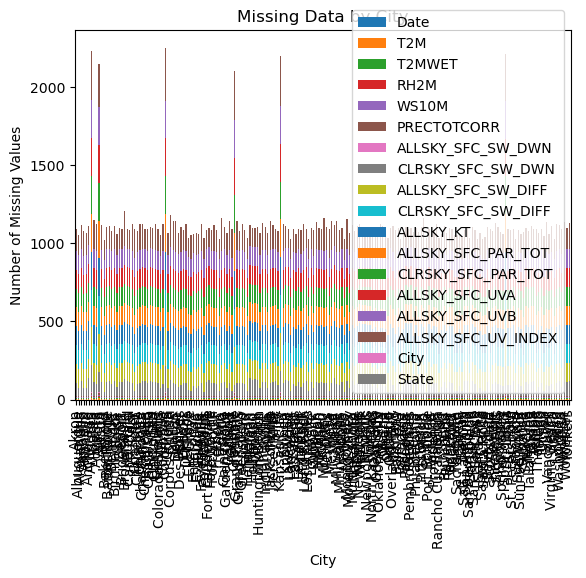

In [10]:
missing_by_city = solar_df.groupby('City').apply(lambda x: x.isnull().sum())


plt.figure(figsize=(20, 40))
missing_by_city.plot(kind='bar', stacked=True)
plt.title('Missing Data by City')
plt.xlabel('City')
plt.ylabel('Number of Missing Values')
plt.show()


That's not easy to read so we need to create sub plots, we'll do 6 separate sub plots

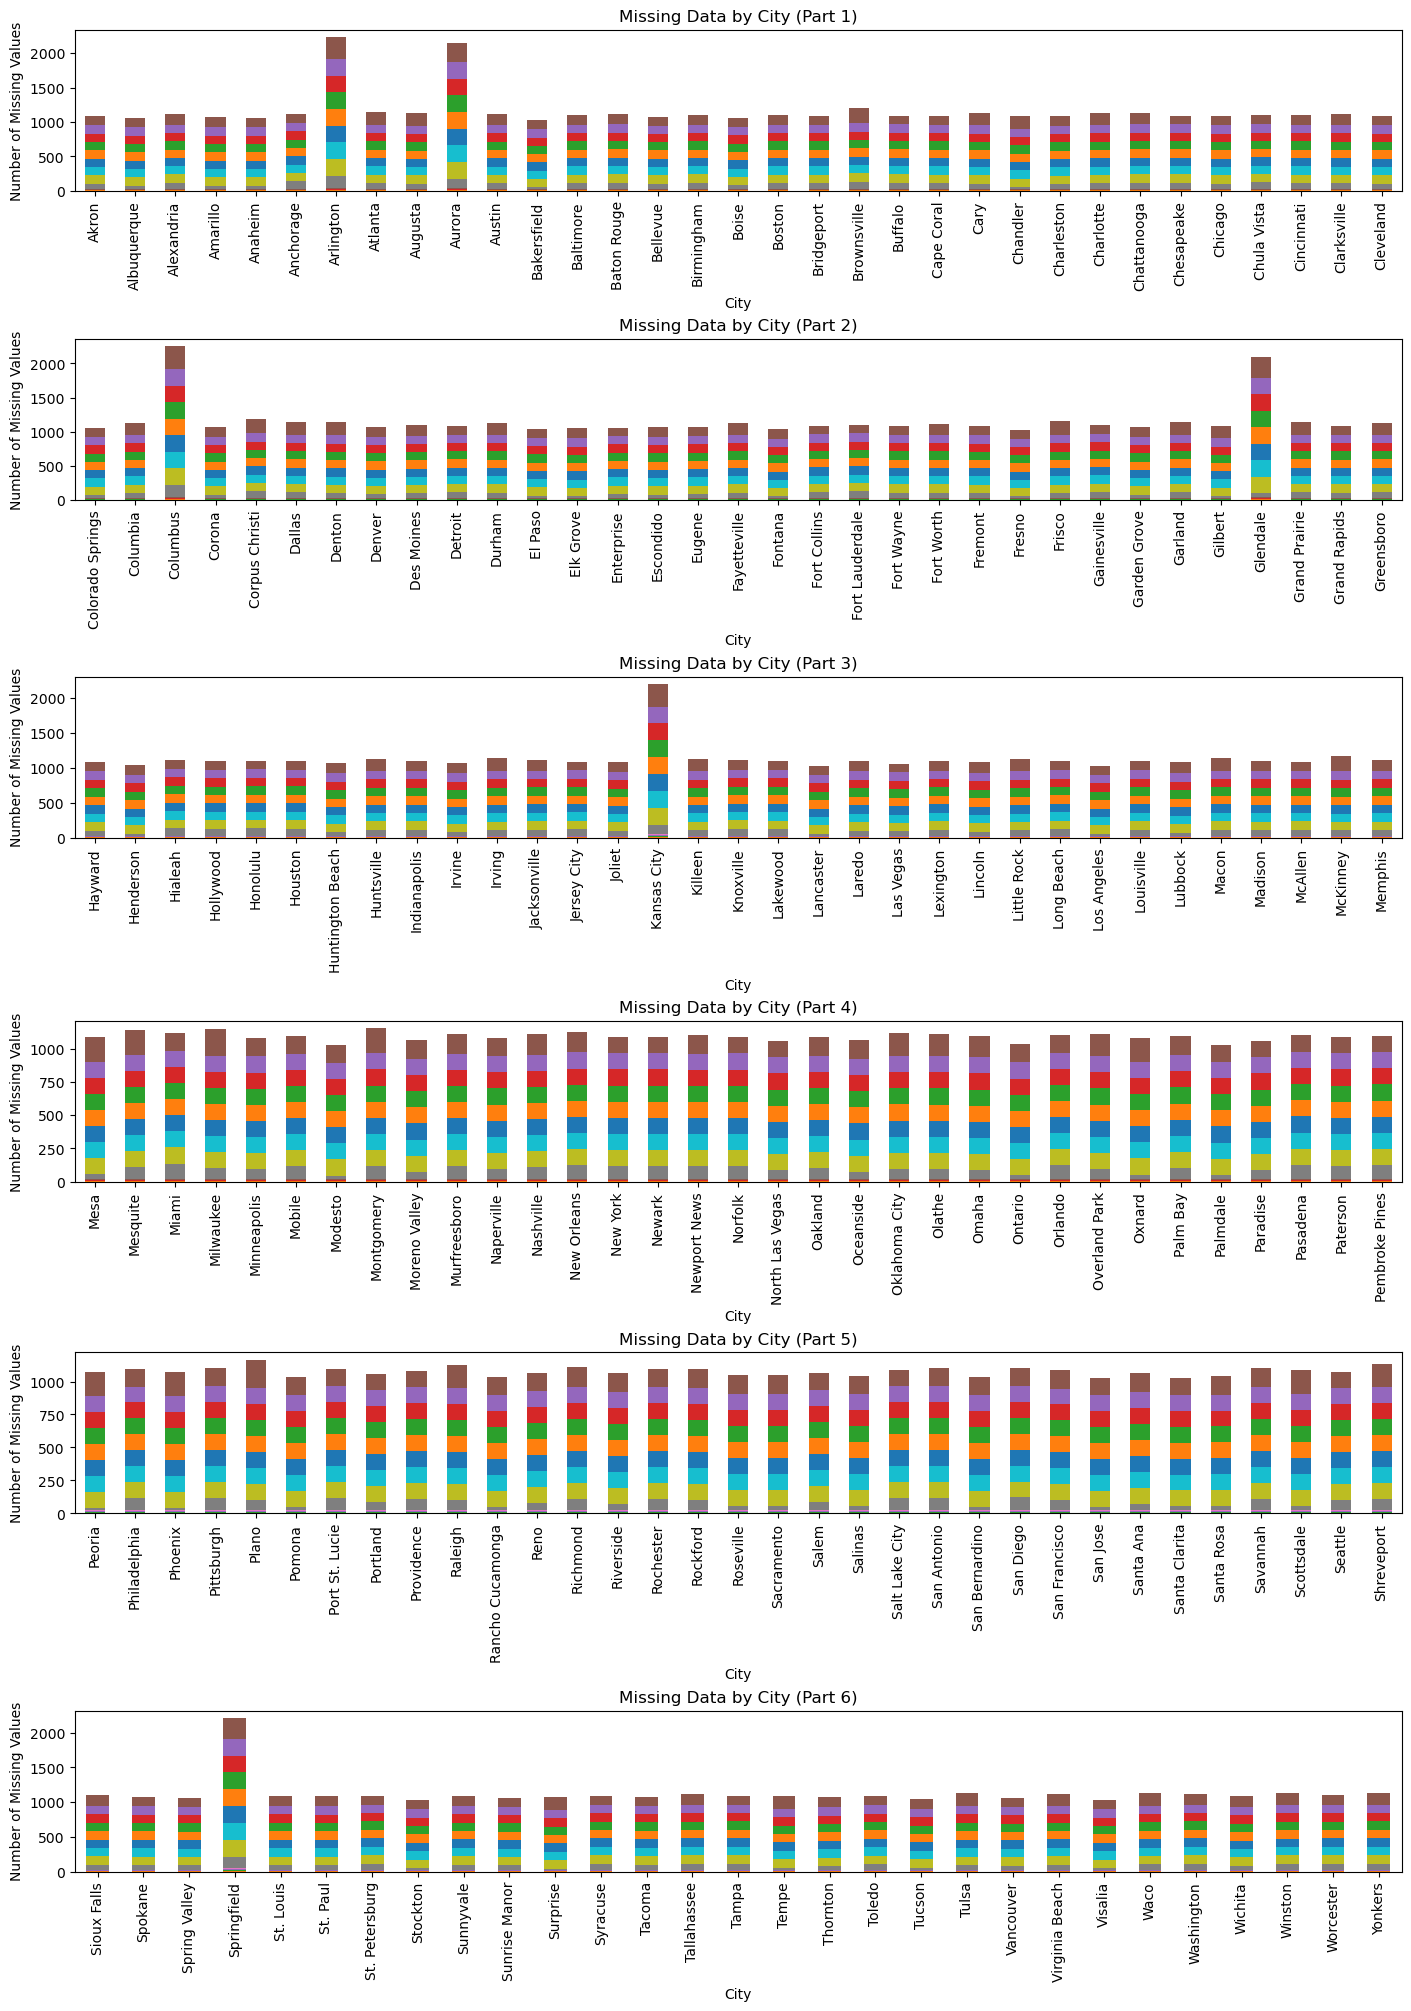

In [11]:
num_subplots = 6
cities_per_plot = int(np.ceil(len(missing_by_city) / num_subplots))

fig, axs = plt.subplots(num_subplots, 1, figsize=(14, 20), constrained_layout=True)
for i in range(num_subplots):
    start = i * cities_per_plot
    end = start + cities_per_plot
    missing_by_city.iloc[start:end].plot(kind='bar', stacked=True, ax=axs[i], legend=False)
    axs[i].set_title(f'Missing Data by City (Part {i+1})')
    axs[i].set_xlabel('City')
    axs[i].set_ylabel('Number of Missing Values')
    axs[i].set_xticklabels(missing_by_city.index[start:end], rotation=90)

plt.show()

The graph above shows that there are a few cities with higher NULL values than others. Let's ee if we can see data samples via month.

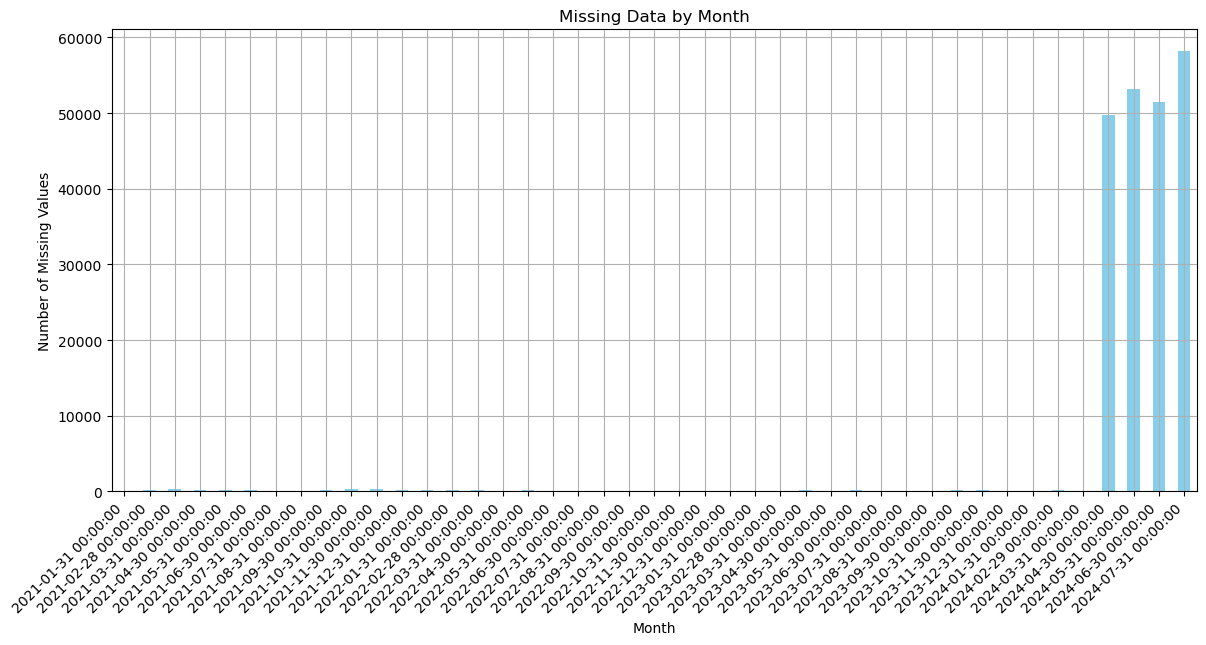

In [13]:
missing_by_month = solar_df.set_index('Date').isnull().resample('M').sum().sum(axis=1)


plt.figure(figsize=(14, 6))
missing_by_month.plot(kind='bar', color='skyblue')

# Set x-axis to show months
plt.title('Missing Data by Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.show()

The above shows that the majority of the missing values are in April 2024 and onward. We are going to filter out and delete the rows with dates after March 31, 2024

In [14]:
cutoff_date = pd.to_datetime('2024-03-31')
solar_df_filtered = solar_df[solar_df['Date'] <= cutoff_date]

print(f"Original dataset size: {solar_df.shape}")
print(f"Filtered dataset size: {solar_df_filtered.shape}")

Original dataset size: (261600, 18)
Filtered dataset size: (237200, 18)


In [16]:
missing_values_after_filter = solar_df_filtered.isnull().sum()
print(missing_values_after_filter)

Date                      0
T2M                       0
T2MWET                    0
RH2M                      0
WS10M                     0
PRECTOTCORR               0
ALLSKY_SFC_SW_DWN         0
CLRSKY_SFC_SW_DWN         0
ALLSKY_SFC_SW_DIFF        0
CLRSKY_SFC_SW_DIFF        0
ALLSKY_KT                 0
ALLSKY_SFC_PAR_TOT        0
CLRSKY_SFC_PAR_TOT        0
ALLSKY_SFC_UVA            0
ALLSKY_SFC_UVB            0
ALLSKY_SFC_UV_INDEX    5338
City                      0
State                     0
dtype: int64


So we are still missing 5338 entries for ALLSKY_SFC_UV_INDEX

###### So now that we need to fill in the NaN's our data is a bit unique, we aren't able to just forward of backward fill... we could but I believe that wouldn't be a good idea because weather can fluctuate and there are times in some cases where the city will be different.


We will use linear regression to fill in the missing values for ALLSKY_SFC_UV_INDEX, this would be the best approach especially considering the variability in weather data across different cities and weather changes. 

So we will separate the rows with the missing data, select the features that we will use as predictors for the UV index. Train the model, predict missing values and impute the missing values. 

In [18]:
complete_data = solar_df_filtered.dropna(subset=['ALLSKY_SFC_UV_INDEX'])
missing_data = solar_df_filtered[solar_df_filtered['ALLSKY_SFC_UV_INDEX'].isna()]

features = [
    'T2M', 'T2MWET', 'RH2M', 'WS10M', 'PRECTOTCORR',
    'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DIFF', 
    'CLRSKY_SFC_SW_DIFF', 'ALLSKY_KT', 'ALLSKY_SFC_PAR_TOT',
    'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB'
]

X = complete_data[features]
y = complete_data['ALLSKY_SFC_UV_INDEX']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.023866922127741205
Mean Squared Error (MSE): 0.0009643749510853476
Root Mean Squared Error (RMSE): 0.03105438698614654
R-squared (R2): 0.9985567177565161


###### The model scored very well. The errors are very low and the R2 is 0.9986

So we are going to use the trained linear regression model to impute the missing values in the UV_Index Column

In [20]:
X_missing = missing_data[features]
predicted_values = model.predict(X_missing)

solar_df_filtered.loc[solar_df_filtered['ALLSKY_SFC_UV_INDEX'].isna(), 'ALLSKY_SFC_UV_INDEX'] = predicted_values

In [22]:
missing_values_new = solar_df_filtered.isnull().sum()
print(missing_values_new)

Date                   0
T2M                    0
T2MWET                 0
RH2M                   0
WS10M                  0
PRECTOTCORR            0
ALLSKY_SFC_SW_DWN      0
CLRSKY_SFC_SW_DWN      0
ALLSKY_SFC_SW_DIFF     0
CLRSKY_SFC_SW_DIFF     0
ALLSKY_KT              0
ALLSKY_SFC_PAR_TOT     0
CLRSKY_SFC_PAR_TOT     0
ALLSKY_SFC_UVA         0
ALLSKY_SFC_UVB         0
ALLSKY_SFC_UV_INDEX    0
City                   0
State                  0
dtype: int64


##### The above shows that there are no longer any missing values. 

Let's now select his as our main df and export to csv 

In [23]:
df = solar_df_filtered

df.to_csv('cleaned_solar_data.csv', index=False)

### Now that we have completed the datawrangling we will work on the EDA

# PLEASE NOTE>  IGNORE BELOW. 

### EVERYTHING BELOW WAS JUST OTHER CODE I WAS TRYING WHICH DID NOT WORK. WILL KEEP AS I WILL BE REFERING TO THIS TO EXPLAIN DIFFICULTY I HAD EXPERIENCED IN MY DOCUMENTATION AT A LATER TIME. 

In [37]:

cities_with_over_2000_missing = missing_by_city[missing_by_city.sum(axis=1) > 2000].index

data_with_nan = solar_df[solar_df['City'].isin(cities_with_over_2000_missing) & solar_df.isnull().any(axis=1)]


data_with_nan.head(50)

,Date,T2M,T2MWET,RH2M,WS10M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,City,State
18373,2021-03-03,3.69,1.40,74.06,4.92,0.00,5.24,5.19,0.63,0.73,0.76,93.02,92.47,11.31,0.16,NaN,Columbus,Ohio
18390,2021-03-20,4.12,0.67,64.56,3.38,0.00,5.84,6.21,1.01,0.94,0.72,103.36,110.47,13.02,0.23,NaN,Columbus,Ohio
18391,2021-03-21,7.09,4.00,68.81,4.07,0.00,6.36,6.33,0.73,0.81,0.78,112.55,112.12,14.00,0.26,NaN,Columbus,Ohio
18392,2021-03-22,10.58,7.80,70.50,4.41,0.00,6.06,6.31,1.83,0.89,0.73,108.61,112.91,13.73,0.30,NaN,Columbus,Ohio
18399,2021-03-29,4.58,1.83,70.81,3.18,0.02,6.45,6.71,0.84,0.82,0.74,115.12,119.97,14.62,0.23,NaN,Columbus,Ohio
18400,2021-03-30,12.09,9.15,69.94,7.32,1.57,6.16,6.73,2.76,0.94,0.70,110.38,120.31,14.23,0.28,NaN,Columbus,Ohio
18404,2021-04-03,5.99,2.37,62.19,5.56,0.00,6.39,6.77,1.55,1.24,0.71,115.10,121.43,14.65,0.26,NaN,Columbus,Ohio
18431,2021-04-30,10.62,7.51,68.31,6.89,0.59,6.20,7.97,1.99,1.28,0.59,115.27,145.73,15.13,0.31,NaN,Columbus,Ohio
18580,2021-09-26,15.63,11.16,60.56,4.33,0.00,5.50,5.59,0.75,0.82,0.71,102.22,104.15,12.66,0.23,NaN,Columbus,Ohio
18602,2021-10-18,11.81,7.88,62.69,3.64,0.00,4.55,4.56,0.54,0.63,0.73,82.61,83.92,9.97,0.16,NaN,Columbus,Ohio


### Above wasn't helpful. 

Let's do a bargraph and see. This shows that UV Index has a lot more missing values. Let's check via date

In [1]:
# Count missing values by column in the filtered data
missing_counts = data_with_nan.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values by Column for Cities with More than 2000 Missing Values')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.show()

NameError: name 'data_with_nan' is not defined

Let's try Seaborn to see if we can can get additional insight

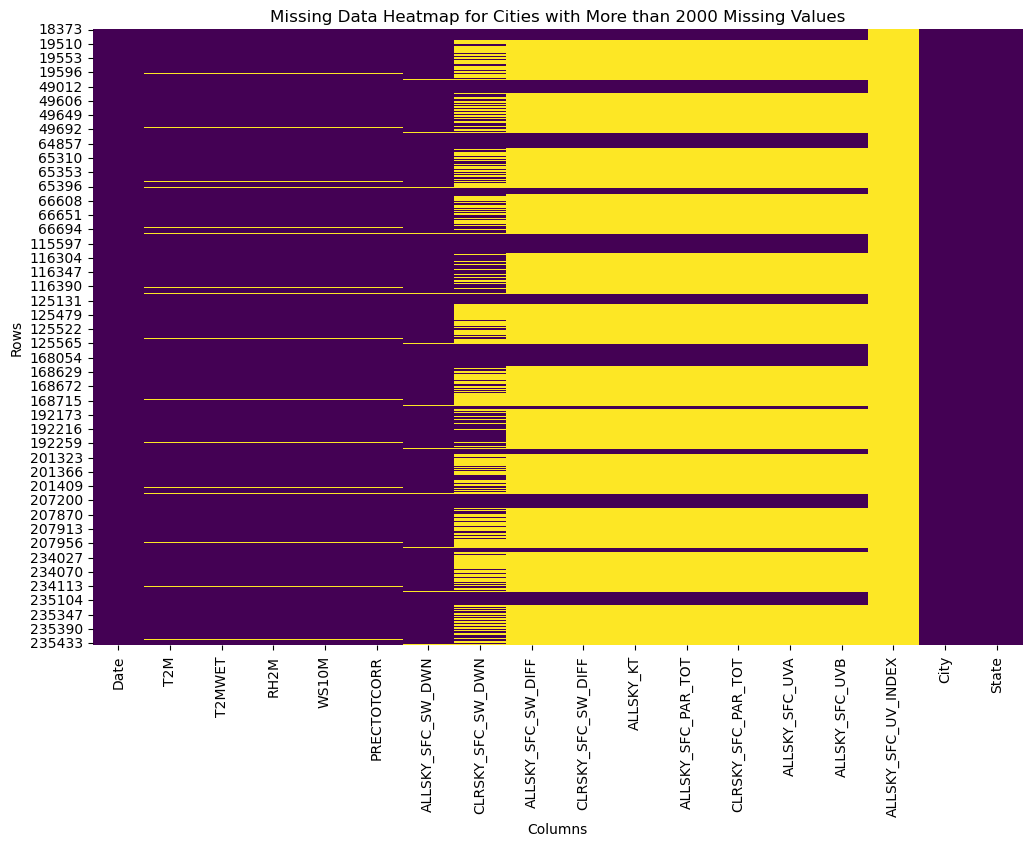

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(data_with_nan.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap for Cities with More than 2000 Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


### Let's try to do a line graph for the date and see if the missing data is after a certain date

In [40]:
missing_by_date = data_with_nan.groupby('Date').apply(lambda x: x.isnull().sum())
missing_by_date_sum = missing_by_date.sum(axis=1)

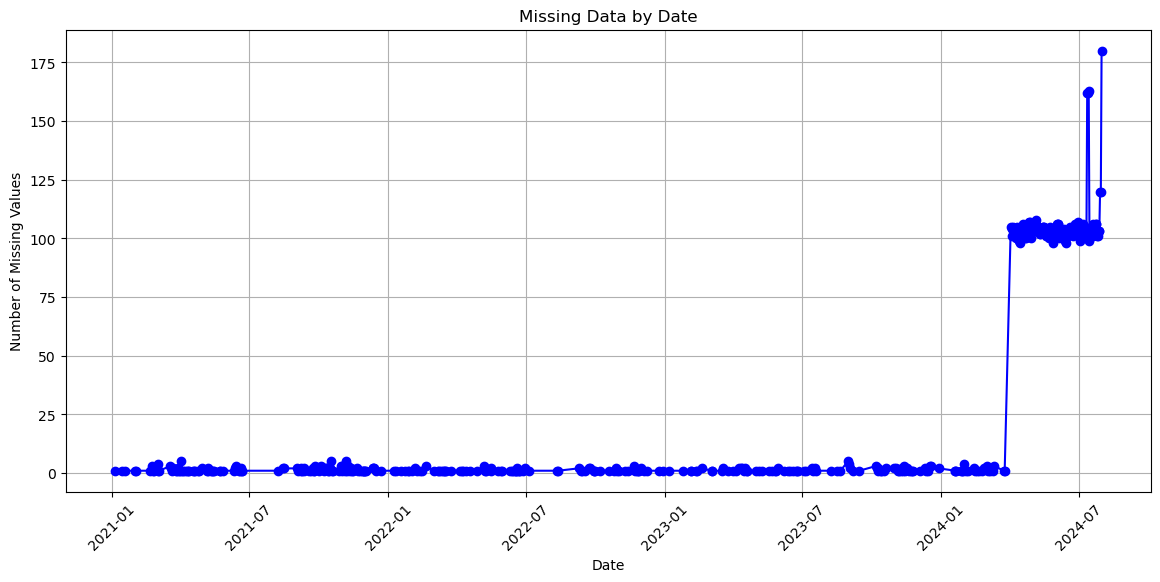

In [41]:
plt.figure(figsize=(14, 6))
plt.plot(missing_by_date_sum, marker='o', linestyle='-', color='b')
plt.title('Missing Data by Date')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Seems like majority of the data after May is missing. 

Let's try to get a high number of missing dates, over 50+ missing values and get data for those missing dates. We'll try visualizing as well

In [2]:

high_missing_dates = missing_by_date_sum[missing_by_date_sum > 50]  
print(high_missing_dates)


filtered_data_with_nan = data_with_nan[data_with_nan['Date'].isin(high_missing_dates.index)]
print(filtered_data_with_nan[['Date', 'City']].drop_duplicates())

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data_with_nan.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data for Specific Dates')
plt.xlabel('Columns')
plt.ylabel('Data Points')
plt.show()

SyntaxError: invalid syntax (880703402.py, line 1)

###### That wasn't very helpful so let's try focusing on data after March 29th, since a graph earlier showed that most of the data was missing after April 1st. 

In [53]:

filtered_df = solar_df[solar_df['Date'] > '2024-03-29']


missing_by_date = filtered_df.groupby('Date').apply(lambda x: x.isnull().sum())

print("Missing Data Trends After April 2024:")
missing_by_date.head(100)


Missing Data Trends After April 2024:


,Date,T2M,T2MWET,RH2M,WS10M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,City,State
Date,,,,,,,,,,,,,,,,,,
2024-03-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0
2024-03-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2024-04-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
2024-04-02,0,0,0,0,0,0,0,122,200,200,200,200,200,200,200,200,0,0
2024-04-03,0,0,0,0,0,0,0,112,200,200,200,200,200,200,200,200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-03,0,0,0,0,0,0,0,92,200,200,200,200,200,200,200,200,0,0
2024-07-04,0,0,0,0,0,0,0,131,200,200,200,200,200,200,200,200,0,0
2024-07-05,0,0,0,0,0,0,0,111,200,200,200,200,200,200,200,200,0,0


Let's try to check for one of the features but graph it for all cities. 

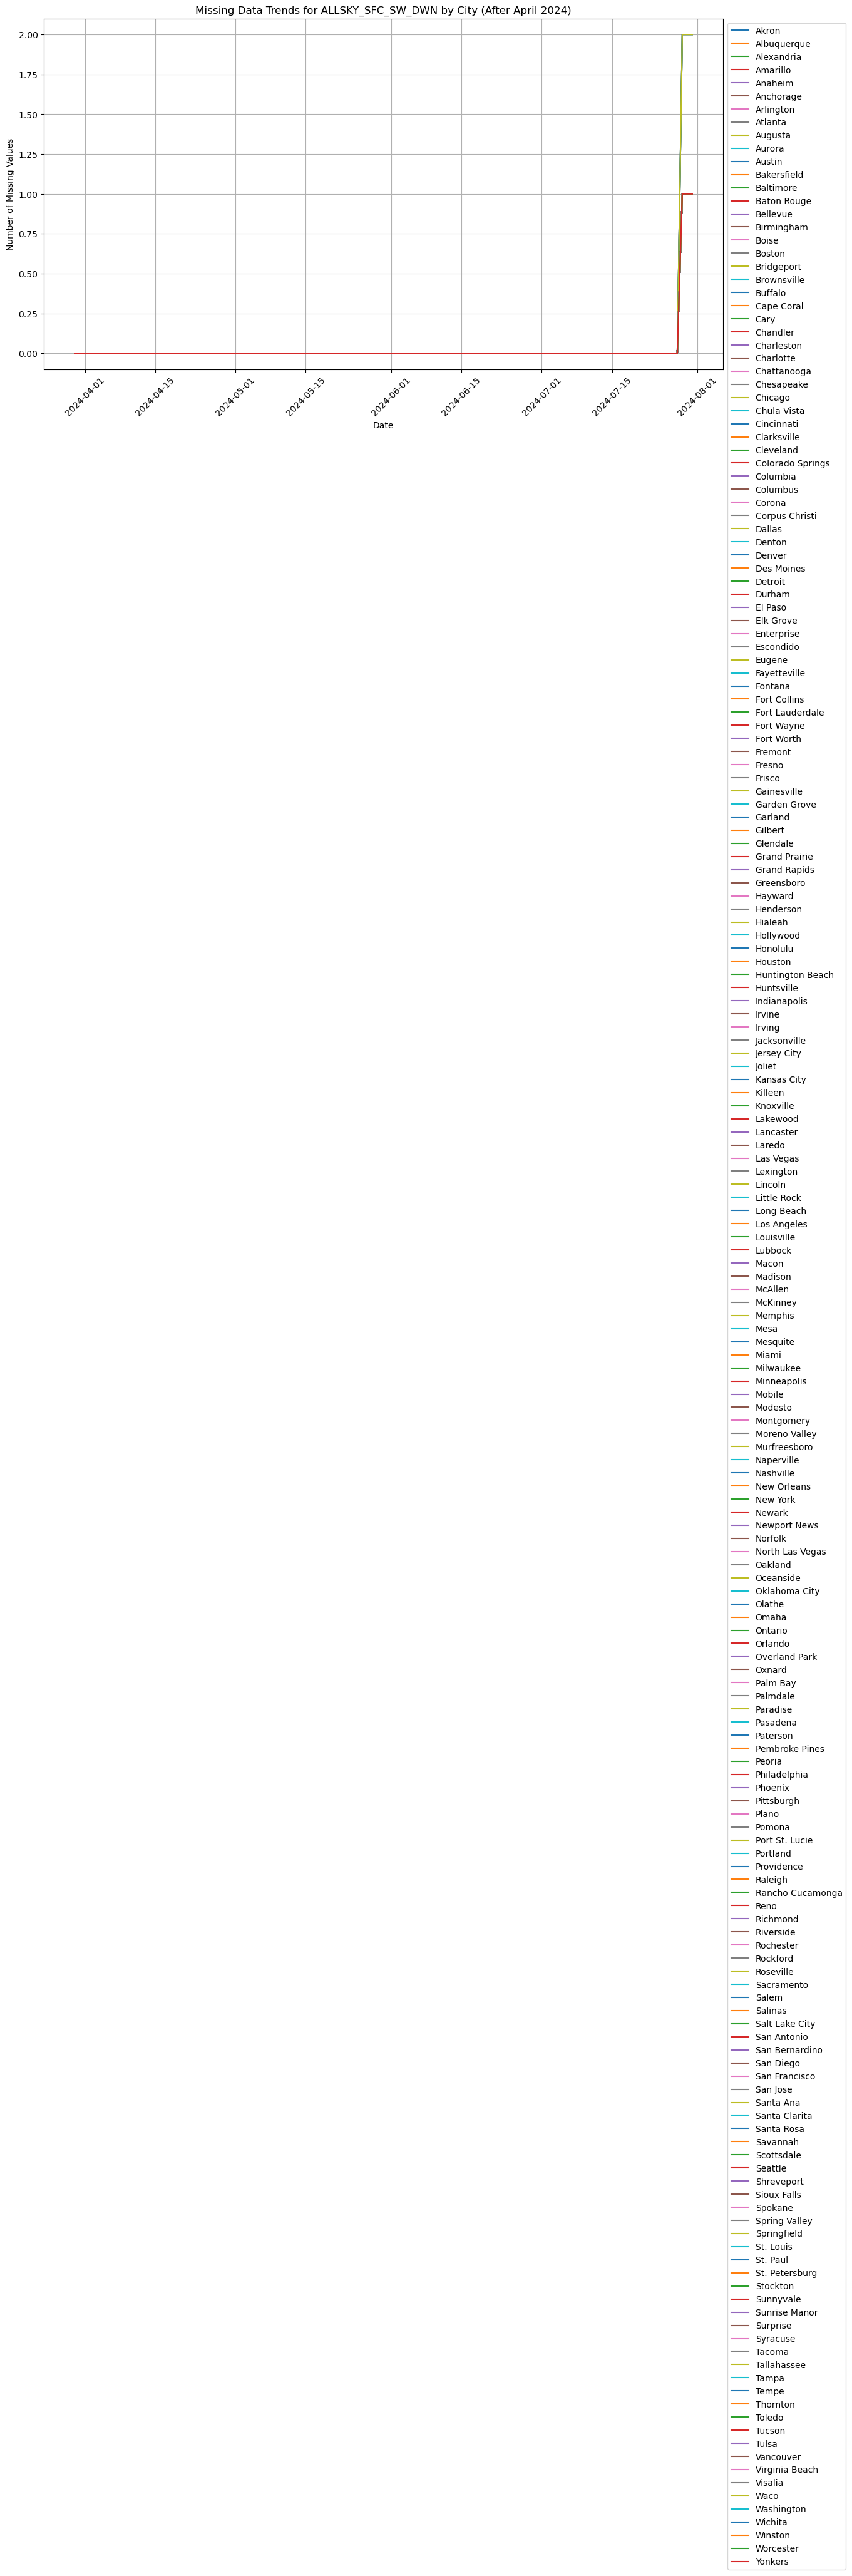

In [60]:
plt.figure(figsize=(14, 8))
for city in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[city], label=city)

plt.title('Missing Data Trends for ALLSKY_SFC_SW_DWN by City (After April 2024)')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.subplots_adjust(bottom=0.2, top=0.9)  
plt.show()


#### This graph isn't clean we can look into another feature T2M

C:\Users\darde\AppData\Local\Temp\ipykernel_1468\3202867467.py:30: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



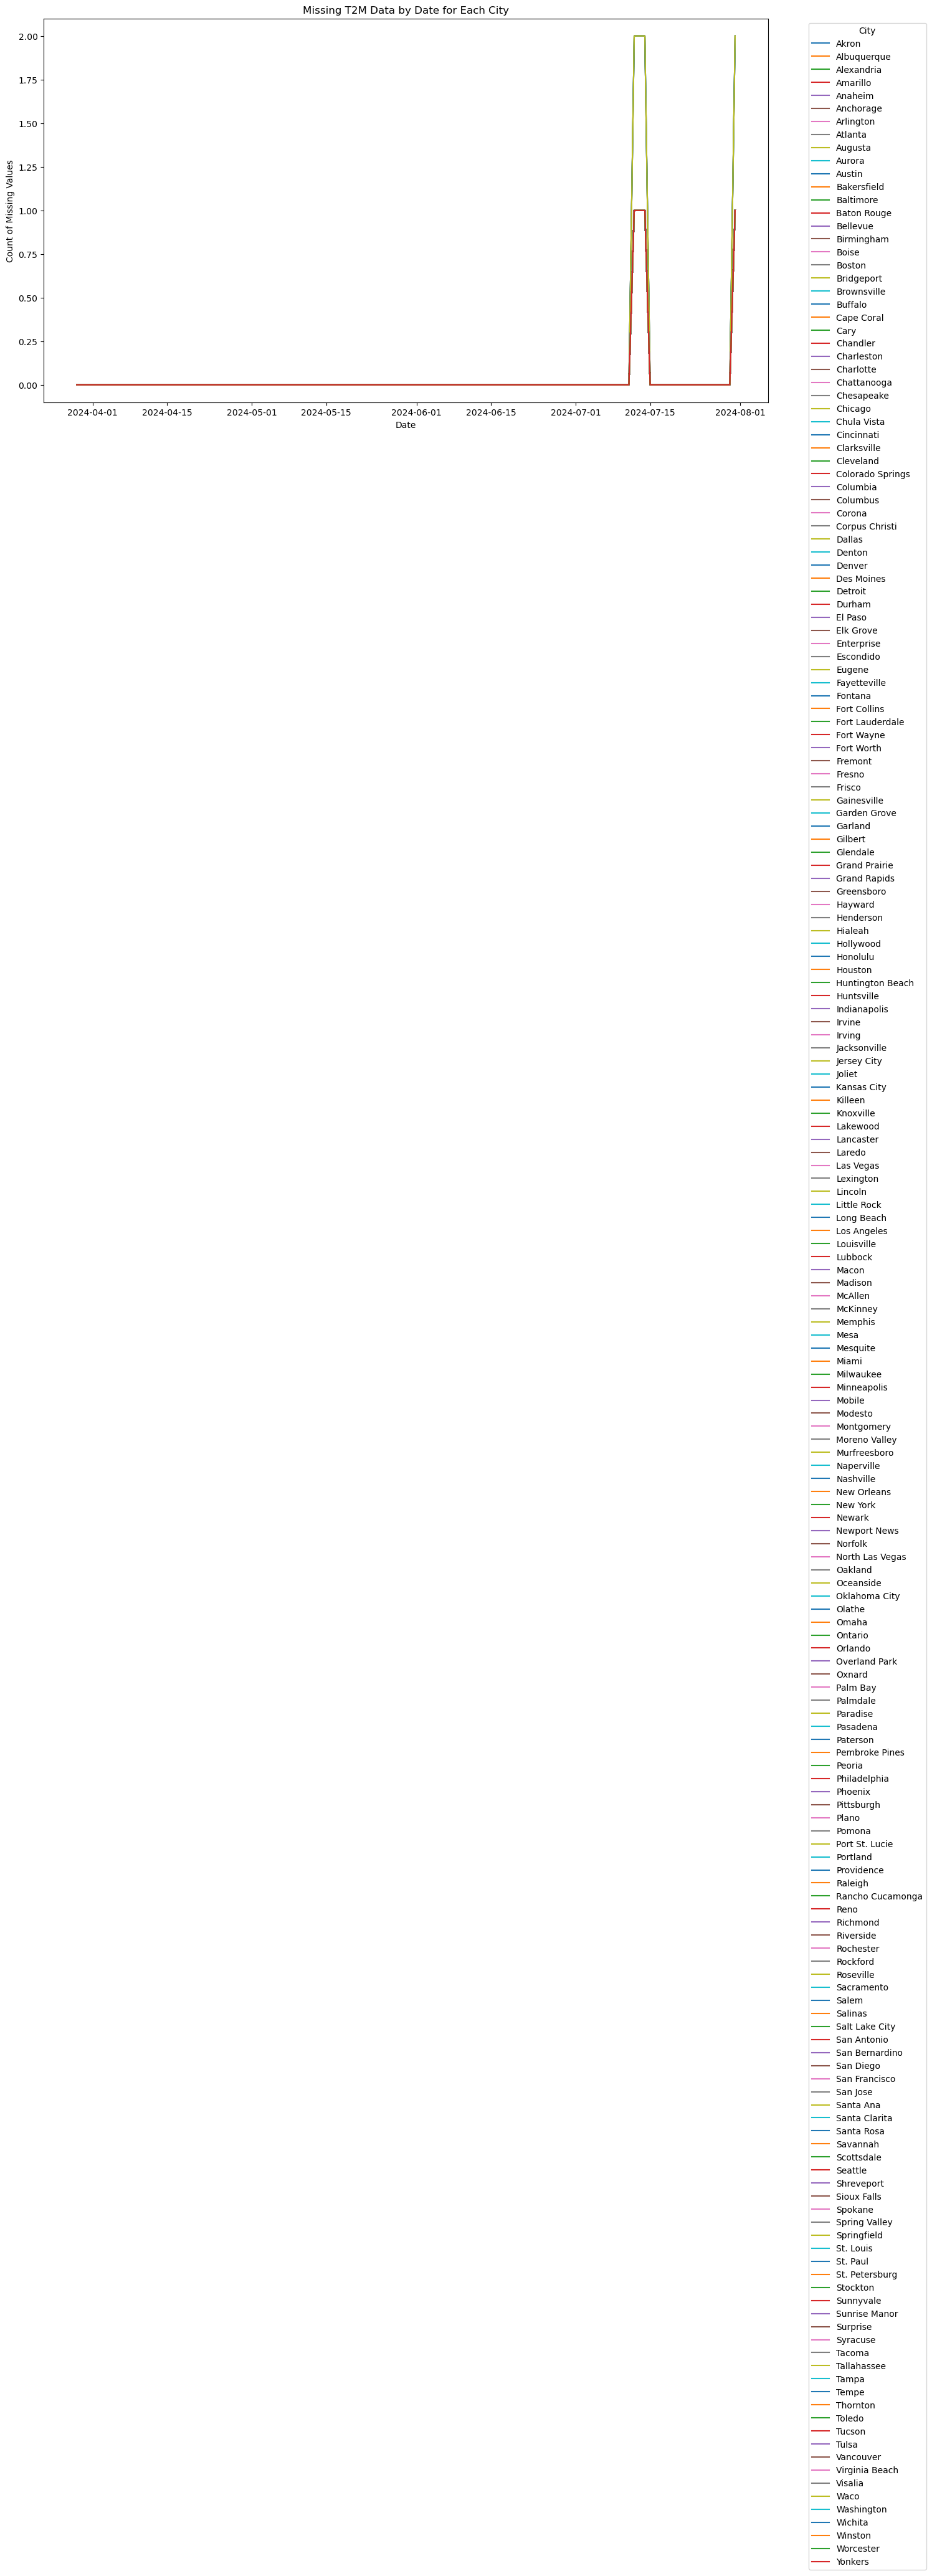

In [66]:

missing_by_date_and_city = filtered_df.groupby(['Date', 'City'])['T2M'].apply(lambda x: x.isnull().sum()).reset_index(name='Missing_Count')


pivot_data = missing_by_date_and_city.pivot(index='Date', columns='City', values='Missing_Count')

plt.figure(figsize=(15, 8))

for city in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[city], label=city)

plt.title('Missing T2M Data by Date for Each City')
plt.xlabel('Date')
plt.ylabel('Count of Missing Values')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### This isn't very clear mainly because there are too many cities that's being graphed. So maybe we can split the cities into 20 or 25 so they are subplotted separately

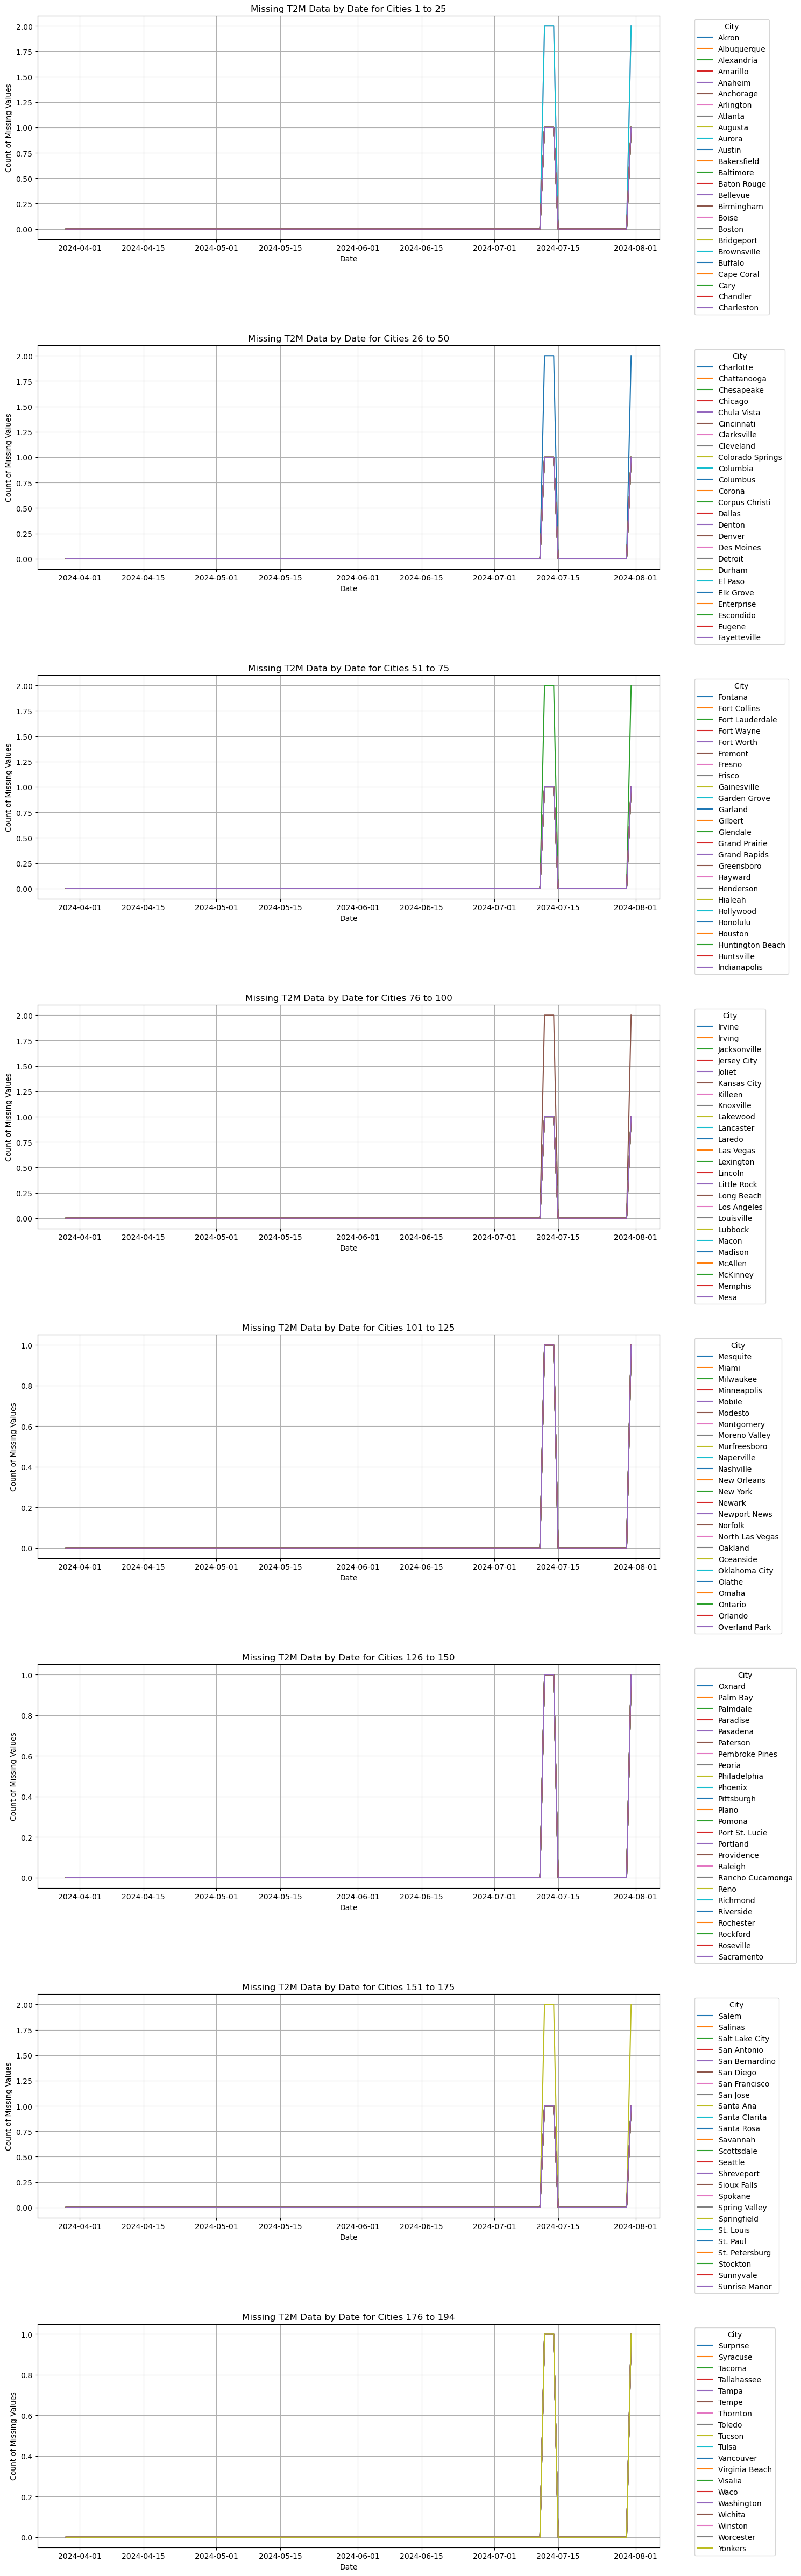

In [67]:

cities_per_plot = 25
city_names = pivot_data.columns
num_plots = (len(city_names) + cities_per_plot - 1) // cities_per_plot 

fig, axs = plt.subplots(num_plots, 1, figsize=(15, num_plots * 6))

if num_plots == 1:
    axs = [axs]  


for i in range(num_plots):
    start = i * cities_per_plot
    end = start + cities_per_plot
    ax = axs[i]
    
    for city in city_names[start:end]:
        ax.plot(pivot_data.index, pivot_data[city], label=city)
    
    ax.set_title(f'Missing T2M Data by Date for Cities {start + 1} to {min(end, len(city_names))}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Count of Missing Values')
    ax.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)


plt.tight_layout()
plt.show()


##### Seems most of the cities don't have data after April 1st, we are going to delete this data as NASA Power only collects data 4 months back and it hasn't been uploaded. Getting new data has the same results. 

In [73]:

filtered_solar_df = solar_df[solar_df['Date'] < '2024-04-01']


max_date = filtered_solar_df['Date'].max()
print(max_date)

2024-03-31 00:00:00


Okay so now our max date is March 31, 2024. Let's try to graph or visualize this again and see what we get. 

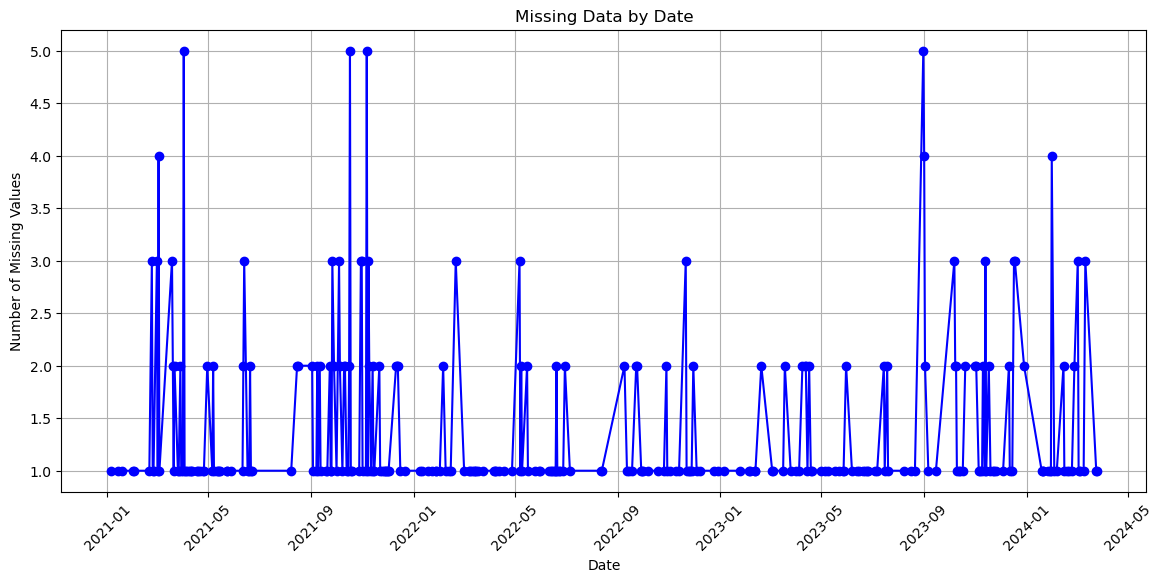

In [75]:



filtered_data_with_nan = filtered_solar_df[filtered_solar_df['City'].isin(cities_with_over_2000_missing) & filtered_solar_df.isnull().any(axis=1)]

missing_by_date = filtered_data_with_nan.groupby('Date').apply(lambda x: x.isnull().sum())
missing_by_date_sum = missing_by_date.sum(axis=1)


plt.figure(figsize=(14, 6))
plt.plot(missing_by_date_sum, marker='o', linestyle='-', color='b')
plt.title('Missing Data by Date')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Okay so this looks alot better Let's see if we can count missing values and visualize it again

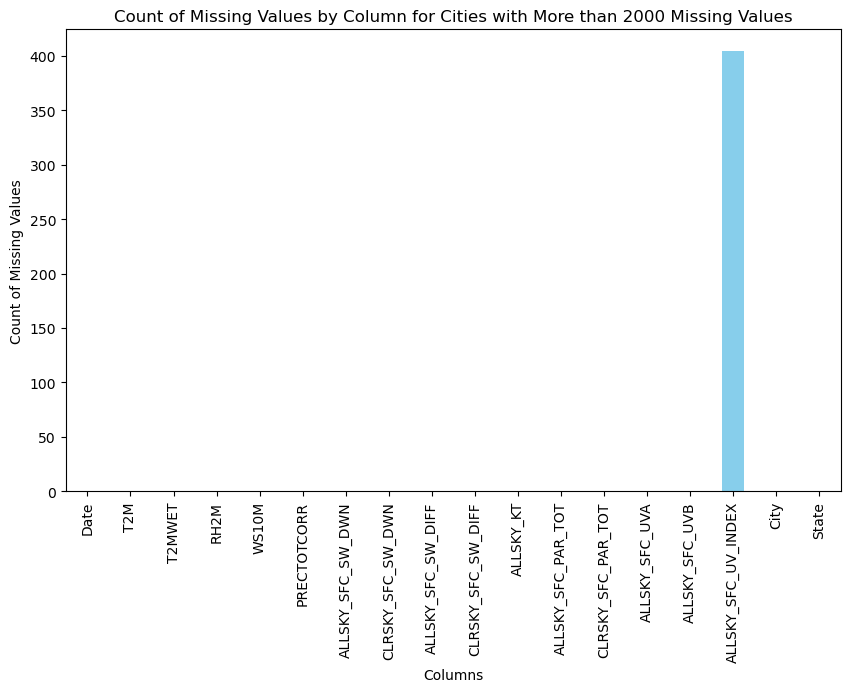

In [76]:

new_missing_counts = filtered_data_with_nan.isnull().sum()

plt.figure(figsize=(10, 6))
new_missing_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values by Column for Cities with More than 2000 Missing Values')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.show()

In [79]:
nan_uv_index_data = filtered_solar_df[filtered_solar_df['ALLSKY_SFC_UV_INDEX'].isna()]

print(nan_uv_index_data)

             Date    T2M  T2MWET   RH2M  WS10M  PRECTOTCORR  \
406    2022-02-11   5.64    4.35  83.81   4.63         0.00   
423    2022-02-28  -0.43   -3.74  60.44   5.47         0.00   
1415   2021-04-18  19.76    9.09  28.88   4.39         0.00   
1552   2021-09-02  20.30   17.34  71.19   2.03         0.00   
1568   2021-09-18  18.53   14.01  60.12   2.16         0.00   
...           ...    ...     ...    ...    ...          ...   
261178 2023-06-06  25.53   22.47  69.62   3.52         0.02   
261204 2023-07-02  29.32   25.48  66.12   1.78         0.07   
261429 2024-02-12  22.37   20.74  82.94   5.39         0.95   
261474 2024-03-28  22.93   20.39  75.56   7.03         1.14   
261476 2024-03-30  21.58   17.48  62.00   2.19         0.00   

        ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DIFF  \
406                  3.74               3.85                0.72   
423                  4.91               5.02                0.64   
1415                 7.96              

In [80]:
filtered_solar_df.describe()

,Date,T2M,T2MWET,RH2M,WS10M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
count,237200,237200.000000,237200.000000,237200.000000,237200.000000,237200.000000,237200.000000,237200.000000,237200.000000,237200.000000,237200.000000,237200.000000,237200.000000,237200.000000,237200.000000,231862.000000
mean,2022-08-16 11:59:59.999999744,15.583698,11.761285,67.201611,3.532009,2.298049,4.689694,5.786153,1.555202,1.169595,0.570396,87.759314,107.156005,11.363759,0.254247,1.288348
min,2021-01-01 00:00:00,-28.850000,-29.450000,3.440000,0.340000,0.000000,0.100000,0.200000,0.080000,0.060000,0.050000,1.390000,3.110000,0.200000,0.000000,0.000000
25%,2021-10-24 00:00:00,8.770000,5.400000,56.620000,2.290000,0.000000,3.050000,4.110000,0.890000,0.680000,0.460000,56.427500,75.060000,7.120000,0.120000,0.560000
50%,2022-08-16 12:00:00,16.090000,12.200000,71.940000,3.140000,0.050000,4.680000,5.940000,1.400000,1.020000,0.620000,87.060000,109.480000,11.180000,0.230000,1.180000
75%,2023-06-09 00:00:00,23.440000,18.900000,81.750000,4.380000,1.400000,6.430000,7.500000,2.110000,1.510000,0.710000,121.160000,140.980000,15.720000,0.380000,1.950000
max,2024-03-31 00:00:00,39.890000,28.870000,100.000000,17.090000,150.690000,9.420000,9.580000,4.690000,4.420000,0.840000,169.440000,169.270000,23.390000,0.710000,3.850000
std,NaN,9.860841,9.033778,19.757388,1.697987,6.109825,2.137052,1.887883,0.805924,0.621255,0.176208,40.203744,36.146645,5.236682,0.158072,0.817581


Let's rename the df to our normal solar_df. 

In [82]:
solar_df = filtered_solar_df

### Imputation. 

So now that we need to fill in the NaN's our data is a bit unique, we aren't able to just forward of backward fill... we could but I believe that wouldn't be a good idea because weather can fluctuate and there are times in some cases where the city will be different. So after looking at the data in excel... this is what we should do. 


For the missing data in AllSKY_SFC_UV_Index, we can get a close estimate or even the exact amount depending on what the ALLSKY_SFC_UVA and ALLSKY_SFC_UVB, these 2 examples when identical for different dates (but the same city) have the same UV_Index. 


So what we need to do is.
1) Filter rows where UV Index is missing
2) Iterate through the missing rows and get the City, UVA, UVB values. 
3) Find a match for the rows with the same city, UVA, UVB values (and make sure it's not the same row or the index is no blank)
4) Save the matching value and impute that where it is blank.

In [83]:



missing_uv_index_df = solar_df[solar_df['ALLSKY_SFC_UV_INDEX'].isnull()]

for index, row in missing_uv_index_df.iterrows():
    city = row['City']
    uva = row['ALLSKY_SFC_UVA']
    uvb = row['ALLSKY_SFC_UVB']
    

    matching_rows = solar_df[(solar_df['City'] == city) & 
                             (solar_df['ALLSKY_SFC_UVA'] == uva) & 
                             (solar_df['ALLSKY_SFC_UVB'] == uvb) &
                             (~solar_df['ALLSKY_SFC_UV_INDEX'].isnull())]  
    
    if not matching_rows.empty:
        imputed_value = matching_rows['ALLSKY_SFC_UV_INDEX'].values[0]  
        solar_df.at[index, 'ALLSKY_SFC_UV_INDEX'] = imputed_value


print(solar_df['ALLSKY_SFC_UV_INDEX'].isnull().sum())


4895


It seems to have worked but I'm not quite sure if it actually worked so I'm going to export this imputed data and see if I can seee it in excel. 

In [84]:
solar_df.to_csv('solar_data_imputed.csv', index=False)

Before we had 5338 misng now we have 4895.

#### Just saved a check point because what I'm going to try next might screw everything up. 

Now what I'm doing to do is find a close match (possibly by 0.02 for UVA and UVB and impute their UVindex for the missing rows. 

So first we need to try to find similar rows based on the same city but similar UVA and UVB. So to get this index we need to create a function. 

The function needs to first check if UV_INDEX is blank,... blank? good. 
- then we need to match the city, and find close matches of UVA and UVB, so the diff between the 2 can be up to 0.02 (we also need to make sure the row where we are finding this match also has a UV_INDEX). 

But if we can't find a match within 0.02 we will return NAN and then try a higher number of 0.05 later. but if we get multiple items that are within 0.02, we can take the average (from the matching rows)


In other words: 
We are going to try to find similar rows based on the same city and similar UVA and UVB values

Take the average UV Index from matching rows
Or return the original NaN if no match

Then we do the same imputation function to the dataset


In [86]:
def impute_uv_index(row, df):
    if pd.isna(row['ALLSKY_SFC_UV_INDEX']):
        matching_rows = df[
            (df['City'] == row['City']) & 
            (df['ALLSKY_SFC_UVA'].between(row['ALLSKY_SFC_UVA'] - 0.02, row['ALLSKY_SFC_UVA'] + 0.02)) & 
            (df['ALLSKY_SFC_UVB'].between(row['ALLSKY_SFC_UVB'] - 0.02, row['ALLSKY_SFC_UVB'] + 0.02)) & 
            (~df['ALLSKY_SFC_UV_INDEX'].isna())
        ]
        
        if not matching_rows.empty:
            return matching_rows['ALLSKY_SFC_UV_INDEX'].mean()
        else:
            return row['ALLSKY_SFC_UV_INDEX']
        else:
            return row['ALLSKY_SFC_UV_INDEX']

solar_df['ALLSKY_SFC_UV_INDEX'] = solar_df.apply(impute_uv_index, axis=1, df=solar_df)

solar_df.isnull().sum()


Date                      0
T2M                       0
T2MWET                    0
RH2M                      0
WS10M                     0
PRECTOTCORR               0
ALLSKY_SFC_SW_DWN         0
CLRSKY_SFC_SW_DWN         0
ALLSKY_SFC_SW_DIFF        0
CLRSKY_SFC_SW_DIFF        0
ALLSKY_KT                 0
ALLSKY_SFC_PAR_TOT        0
CLRSKY_SFC_PAR_TOT        0
ALLSKY_SFC_UVA            0
ALLSKY_SFC_UVB            0
ALLSKY_SFC_UV_INDEX    2002
City                      0
State                     0
dtype: int64

Not sure if this is correct but it seems like we got the missing values down to 2002. I'll export to CSV and review later but first I might need to review this with someone to make sure the function above is correct. 